In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
name_list=['Class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
           'veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [3]:
train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",names=name_list)

In [4]:
train.head(5)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
train.isnull().sum()

Class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

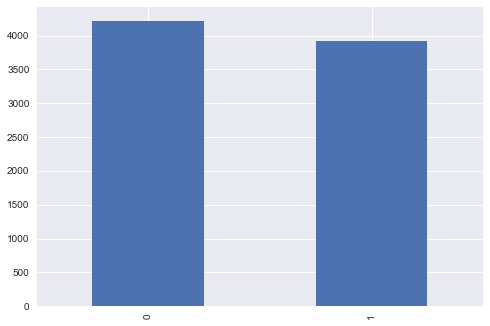

In [8]:
train['Class'].value_counts().sort_index().plot.bar()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])
 

In [10]:
train.head(5)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


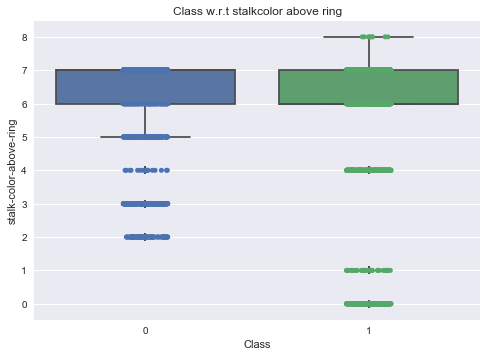

In [11]:
ax = sns.boxplot(x='Class', y='stalk-color-above-ring', 
                data=train)
ax = sns.stripplot(x="Class", y='stalk-color-above-ring',
                   data=train, jitter=True,
                   edgecolor="gray")
sns.plt.title("Class w.r.t stalkcolor above ring",fontsize=12)
sns.plt.show()

In [12]:
features=train.drop("Class",axis=1)
outcomes=train["Class"].values
features.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         100.00 (+/-) 0.00 


In [14]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1072    0]
 [  15  944]]
99.2614475628
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1072
          1       1.00      0.98      0.99       959

avg / total       0.99      0.99      0.99      2031



In [15]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1046   26]
 [   8  951]]
98.325947809
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1072
          1       0.97      0.99      0.98       959

avg / total       0.98      0.98      0.98      2031



In [23]:
final_model = RandomForestClassifier(n_estimators=100,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1072    0]
 [   8  951]]
99.6061053668
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1072
          1       1.00      0.99      1.00       959

avg / total       1.00      1.00      1.00      2031



# random forest by Xgboost

In [31]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.375)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[1072    0]
 [   0  959]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1072
          1       1.00      1.00      1.00       959

avg / total       1.00      1.00      1.00      2031



# Decision tree by Xgboost

In [29]:
from xgboost import XGBClassifier


final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1046   26]
 [   8  951]]
98.325947809
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1072
          1       0.97      0.99      0.98       959

avg / total       0.98      0.98      0.98      2031



# Bagged decision tree

In [38]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=2,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[1072    0]
 [   0  959]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1072
          1       1.00      1.00      1.00       959

avg / total       1.00      1.00      1.00      2031



In [15]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
history=History()

In [26]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 5483 samples, validate on 610 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.65178, saving model to best.model
0s - loss: 0.7802 - acc: 0.5234 - val_loss: 0.6518 - val_acc: 0.6738
Epoch 2/200
Epoch 00001: val_loss improved from 0.65178 to 0.58066, saving model to best.model
0s - loss: 0.7004 - acc: 0.5732 - val_loss: 0.5807 - val_acc: 0.7738
Epoch 3/200
Epoch 00002: val_loss improved from 0.58066 to 0.46719, saving model to best.model
0s - loss: 0.5901 - acc: 0.6949 - val_loss: 0.4672 - val_acc: 0.8213
Epoch 4/200
Epoch 00003: val_loss improved from 0.46719 to 0.40527, saving model to best.model
0s - loss: 0.4965 - acc: 0.7711 - val_loss: 0.4053 - val_acc: 0.8492
Epoch 5/200
Epoch 00004: val_loss improved from 0.40527 to 0.36482, saving model to best.model
0s - loss: 0.4346 - acc: 0.8182 - val_loss: 0.3648 - val_acc: 0.8738
Epoch 6/200
Epoch 00005: val_loss improved from 0.36482 to 0.33988, saving model to best.model
0s - loss: 0.4045 - acc: 0.8337 - val_loss

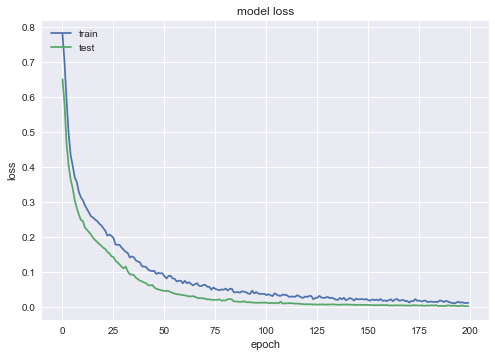

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
m.load_weights("best.model")

In [30]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1072    0]
 [   0  959]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1072
          1       1.00      1.00      1.00       959

avg / total       1.00      1.00      1.00      2031



In [32]:
train.columns

Index([u'Class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'ring-number', u'ring-type', u'spore-print-color',
       u'population', u'habitat'],
      dtype='object')

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11 = Input(shape=(1,))
input_12 = Input(shape=(1,))
input_13 = Input(shape=(1,))
input_14= Input(shape=(1,))
input_15 = Input(shape=(1,))
input_16 = Input(shape=(1,))
input_17 = Input(shape=(1,))
input_18 = Input(shape=(1,))
input_19 = Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22 = Input(shape=(1,))





hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13= Dense(32, activation='sigmoid')(input_13)
hidden_14= Dense(32, activation='sigmoid')(input_14)
hidden_15= Dense(32, activation='sigmoid')(input_15)
hidden_16= Dense(32, activation='sigmoid')(input_16)
hidden_17= Dense(32, activation='sigmoid')(input_17)
hidden_18= Dense(32, activation='sigmoid')(input_18)
hidden_19= Dense(32, activation='sigmoid')(input_19)
hidden_20= Dense(32, activation='sigmoid')(input_20)
hidden_21= Dense(32, activation='sigmoid')(input_21)
hidden_22= Dense(32, activation='sigmoid')(input_22)



value_list=[X_train[['cap-shape']].values,
            X_train[['cap-surface']].values,
            X_train[['cap-color']].values,
            X_train[['bruises']].values,
            X_train[['odor']].values,
            X_train[['gill-attachment']].values,
            X_train[['gill-spacing']].values,
            X_train[['gill-size']].values,
            X_train[['gill-color']].values,
            X_train[['stalk-shape']].values,
            X_train[['stalk-root']].values,
            X_train[['stalk-surface-above-ring']].values,
            X_train[['stalk-surface-below-ring']].values,
            X_train[['stalk-color-above-ring']].values,
            X_train[['stalk-color-below-ring']].values,
            X_train[['ring-number']].values,
            X_train[['ring-type']].values,
            X_train[['spore-print-color']].values,
            X_train[['population']].values,
            X_train[['habitat']].values,
            X_train[['veil-type']].values,
            X_train[['veil-color']].values,
           ]

value_list_test=[X_test[['cap-shape']].values,
            X_test[['cap-surface']].values,
            X_test[['cap-color']].values,
            X_test[['bruises']].values,
            X_test[['odor']].values,
            X_test[['gill-attachment']].values,
            X_test[['gill-spacing']].values,
            X_test[['gill-size']].values,
            X_test[['gill-color']].values,
            X_test[['stalk-shape']].values,
            X_test[['stalk-root']].values,
            X_test[['stalk-surface-above-ring']].values,
            X_test[['stalk-surface-below-ring']].values,
            X_test[['stalk-color-above-ring']].values,
            X_test[['stalk-color-below-ring']].values,
            X_test[['ring-number']].values,
            X_test[['ring-type']].values,
            X_test[['spore-print-color']].values,
            X_test[['population']].values,
            X_test[['habitat']].values,
            X_test[['veil-type']].values,
            X_test[['veil-color']].values,
           ]



x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                             hidden_17,hidden_18,hidden_19,hidden_20,hidden_21,hidden_22])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=, 
)



Train on 5483 samples, validate on 610 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.41683, saving model to best.model
0s - loss: 0.4869 - acc: 0.7828 - val_loss: 0.4168 - val_acc: 0.8459
Epoch 2/200
Epoch 00001: val_loss improved from 0.41683 to 0.30246, saving model to best.model
0s - loss: 0.3440 - acc: 0.8669 - val_loss: 0.3025 - val_acc: 0.9016
Epoch 3/200
Epoch 00002: val_loss improved from 0.30246 to 0.25298, saving model to best.model
0s - loss: 0.2898 - acc: 0.8849 - val_loss: 0.2530 - val_acc: 0.9131
Epoch 4/200
Epoch 00003: val_loss improved from 0.25298 to 0.22284, saving model to best.model
0s - loss: 0.2574 - acc: 0.8959 - val_loss: 0.2228 - val_acc: 0.9164
Epoch 5/200
Epoch 00004: val_loss improved from 0.22284 to 0.21261, saving model to best.model
0s - loss: 0.2308 - acc: 0.9134 - val_loss: 0.2126 - val_acc: 0.9262
Epoch 6/200
Epoch 00005: val_loss improved from 0.21261 to 0.18542, saving model to best.model
0s - loss: 0.2325 - acc: 0.9167 - val_loss

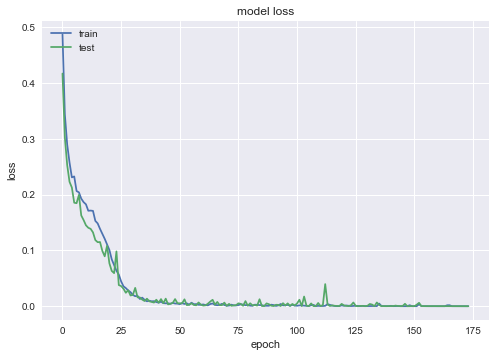

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1072    0]
 [   0  959]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1072
          1       1.00      1.00      1.00       959

avg / total       1.00      1.00      1.00      2031



# neural network ensemble

In [33]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['Class'], axis=1).values
y_val=data_val['Class'].ravel()

In [34]:
def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['Class'], axis=1).values
    y_train=data_train_new['Class'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred
    

In [35]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 4107 samples, validate on 1027 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.68318, saving model to best.model
0s - loss: 0.8463 - acc: 0.5103 - val_loss: 0.6832 - val_acc: 0.5355
Epoch 2/200
Epoch 00001: val_loss improved from 0.68318 to 0.65780, saving model to best.model
0s - loss: 0.7681 - acc: 0.5240 - val_loss: 0.6578 - val_acc: 0.7352
Epoch 3/200
Epoch 00002: val_loss improved from 0.65780 to 0.62107, saving model to best.model
0s - loss: 0.7346 - acc: 0.5466 - val_loss: 0.6211 - val_acc: 0.8043
Epoch 4/200
Epoch 00003: val_loss improved from 0.62107 to 0.56654, saving model to best.model
0s - loss: 0.6855 - acc: 0.5866 - val_loss: 0.5665 - val_acc: 0.8004
Epoch 5/200
Epoch 00004: val_loss improved from 0.56654 to 0.48540, saving model to best.model
0s - loss: 0.6101 - acc: 0.6672 - val_loss: 0.4854 - val_acc: 0.8199
Epoch 6/200
Epoch 00005: val_loss improved from 0.48540 to 0.42027, saving model to best.model
0s - loss: 0.5495 - acc: 0.7285 - val_los

In [36]:
print(len(result))

50


In [37]:
result_new=np.array(result)
result_new

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ..., 
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [40]:
result_new1=result_new.sum(axis=0)
result_new1
re=result_new1.tolist()
re
y_pred=[]
for each in re:
    if each>=25:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[1072    0]
 [   3  956]]
99.8522895126
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1072
          1       1.00      1.00      1.00       959

avg / total       1.00      1.00      1.00      2031



In [42]:
result_new1

array([ 0, 50,  0, ...,  0, 50, 50])